In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

az.rcParams["plot.max_subplots"] = 80

In [2]:
# cdf_file = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Redshift_in_Mass_sigmoid/cdf_files_sigmoid//CBC_O3_smaller_priors_on_middle_m_30_75.cdf"
# "./RUNS/CBC_O3_Reverse_Sector.cdf"
cdf_file = "../data/RUNS/my_reverse_sector_logit_for_middle_z_until_75_from_20_seed_110.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [3]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(20,50),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "high_alpha_z": dist.Normal(0,4),
    "log_width_alpha_z": dist.Uniform(-1,1),
    "middle_m_alpha_z": dist.Uniform(20,75),
    "beta_z":dist.Uniform(0,10),
    "high_beta_z": dist.Uniform(0,10),
    "log_width_beta_z": dist.Uniform(-1,1),
    "middle_m_beta_z": dist.Uniform(20,75),
    "low_zp": dist.Uniform(0.2,4),
    "high_zp": dist.Uniform(0.2,4),
    "log_width_zp": dist.Uniform(-1,1),
    "middle_m_zp": dist.Uniform(20,75),
    "sig_m1": dist.Uniform(1.5, 15)
}

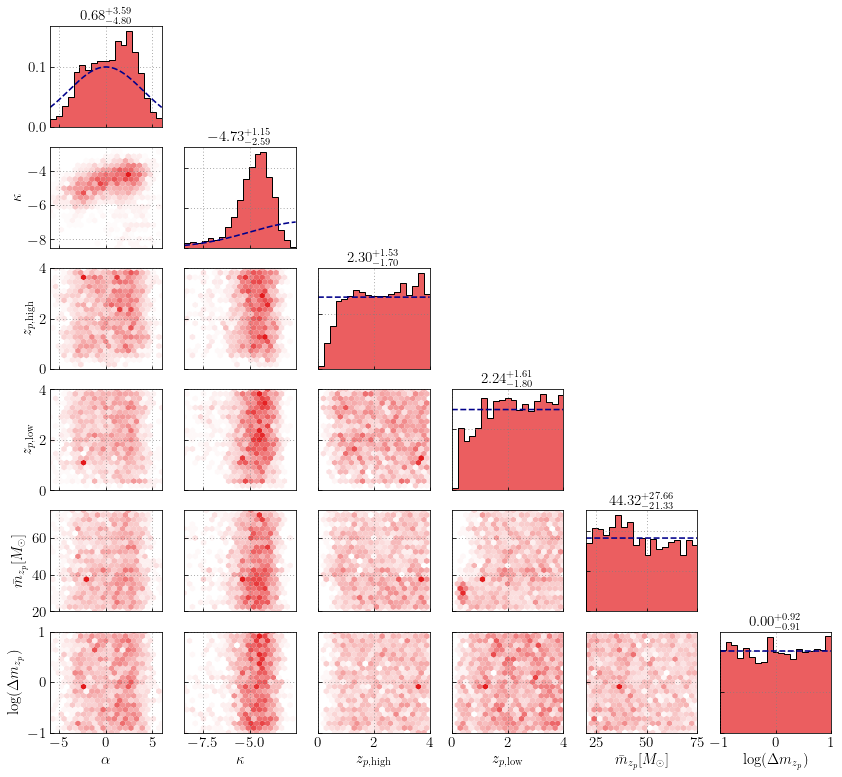

In [4]:
fig = plt.figure(figsize=(14,13))

toPlot_no_GWB = {
    "alpha_z":{"data":samps.alpha_z,"plot_bounds":(-6,6),"label":r"$\alpha$"},
    # "beta_z":{"data":samps.beta_z,"plot_bounds":(0,10),"label":r"$\beta_z$"},
    "alpha_ref":{"data":samps.alpha_ref,"plot_bounds":(-8.5,-2.6),"label":r"$\kappa$"},
    "high_zp":{"data":samps.high_zp,"plot_bounds":(0,4),"label":r"$z_{p, \mathrm{high}}$"},
    "low_zp":{"data":samps.low_zp,"plot_bounds":(0,4),"label":r"$z_{p, \mathrm{low}}$"},
    "middle_m_zp":{"data":samps.middle_m_zp,"plot_bounds":(20,75),"label":r"$\bar m_{z_p} [M_\odot]$"},
    "log_width_zp":{"data":samps.log_width_zp,"plot_bounds":(-1,1),"label":r"log($\Delta m_{z_p}$)"},
}

plot_corner(fig,toPlot_no_GWB,'#e31a1c',labelsize=15, priors = new_priors)
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# plt.tight_layout()
plt.savefig("PE_zp_reverse_sector.pdf", dpi=400, bbox_inches='tight')
plt.show()